<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
train = pd.read_csv(r'C:\Users\ASUS.PIESC\Downloads\16267649167294424\Mini Project 2 - Regression (Bike Sharing Demand)/train.csv')
test = pd.read_csv(r'C:\Users\ASUS.PIESC\Downloads\16267649167294424\Mini Project 2 - Regression (Bike Sharing Demand)/test.csv')

## EDA

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## Data Preprocessing

In [10]:
train.drop('datetime' , axis = 1 , inplace = True)

In [11]:
test.drop('datetime' , axis = 1 , inplace = True)

In [14]:
train.drop('registered' , axis = 1 , inplace = True)

In [16]:
train.drop('casual' , axis = 1 , inplace = True)

In [17]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,0,1,9.84,14.395,81,0.0,16
1,1,0,0,1,9.02,13.635,80,0.0,40
2,1,0,0,1,9.02,13.635,80,0.0,32
3,1,0,0,1,9.84,14.395,75,0.0,13
4,1,0,0,1,9.84,14.395,75,0.0,1


In [13]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,1,1,10.66,11.365,56,26.0027
1,1,0,1,1,10.66,13.635,56,0.0000
2,1,0,1,1,10.66,13.635,56,0.0000
3,1,0,1,1,10.66,12.880,56,11.0014
4,1,0,1,1,10.66,12.880,56,11.0014


## Strorytelling - Visualization

In [19]:
corr = train.corr()
corr.shape

(9, 9)

<Axes: >

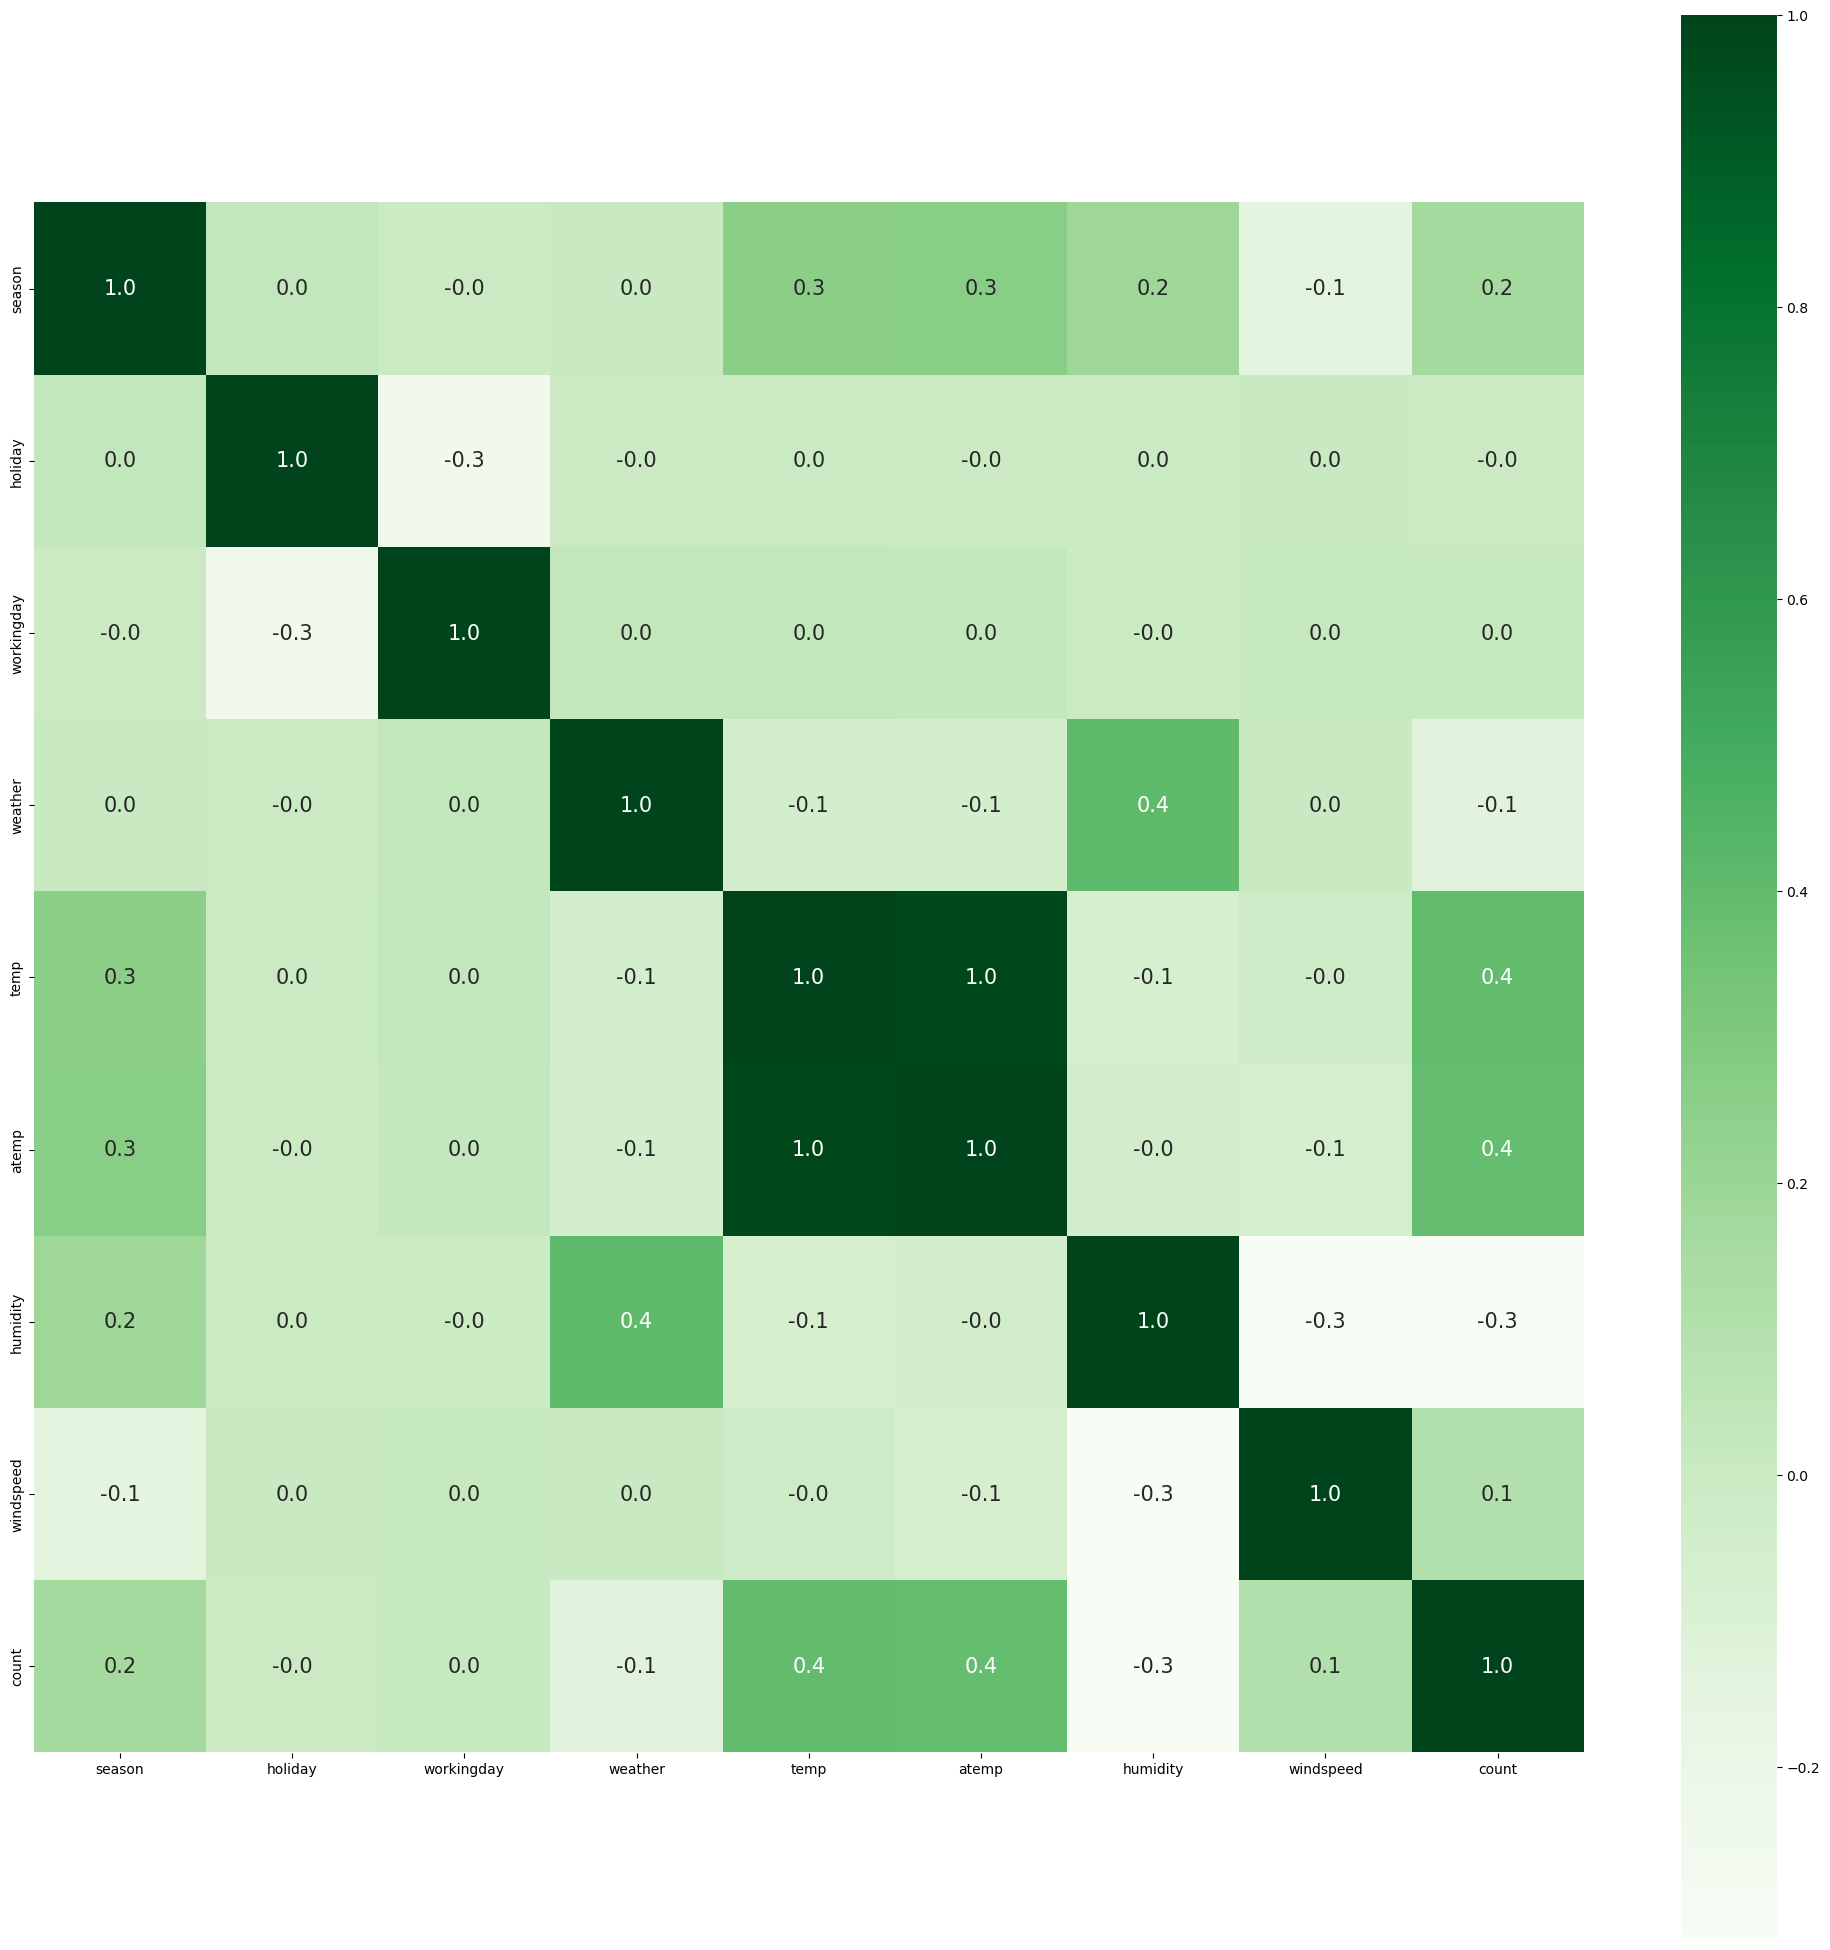

In [20]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [22]:
corr.sort_values(by=["count"],ascending=False).iloc[0].sort_values(ascending=False)

count         1.000000
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

## Train your model (Regression)

In [24]:
X_Train = train[['temp' , 'atemp' , 'season']]
Y_Train = train['count']
X_test = test[['temp' , 'atemp' , 'season']]

In [25]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn import metrics # for checking the model accuracy

In [28]:
logreg = LogisticRegression()
logreg.fit(X_Train , Y_Train)

LogisticRegression()

In [30]:
y_pred = logreg.predict(X_test)

## Test Result

## Send us the Result (Maktabkhoone)